In [0]:
! pip -q install tensorflow==2.0.0.alpha0
import tensorflow as tf
print(tf.__version__)

2.0.0-alpha0


In [0]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

NameError: ignored

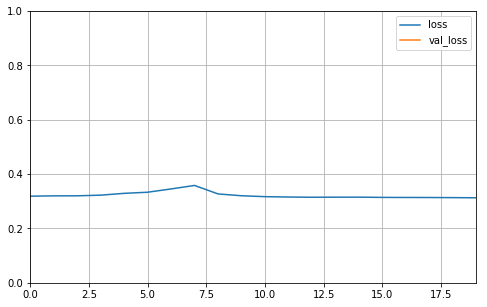

In [0]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [0]:
data = fetch_california_housing()

X_train_full, X_test, Y_train_full, Y_test = train_test_split(data.data, data.target)

X_train, X_val, Y_train, Y_val = train_test_split(X_train_full, Y_train_full)

In [0]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [0]:
input = tf.keras.layers.Input(shape=X_train.shape[1:])
layer1 = tf.keras.layers.Dense(30, activation='relu')(input)
layer2 = tf.keras.layers.Dense(30, activation='relu')(layer1)
wide = tf.keras.layers.Concatenate(axis=1)([input, layer2])
outputs = tf.keras.layers.Dense(1)(wide)
model = tf.keras.models.Model(inputs=[input], outputs=[outputs])

In [0]:
model.summary()

In [0]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [0]:
from tensorflow.keras.callbacks import History
history = History()
model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_val, Y_val))

In [0]:
model.evaluate(X_test, Y_test)

### Subclassing the model

In [0]:
class MyModel(tf.keras.models.Model):
    def __init__(self, **kwargs):
        super(MyModel, self).__init__(**kwargs)
        self.hidden1 = tf.keras.layers.Dense(30, activation='relu')
        self.hidden2 = tf.keras.layers.Dense(30, activation='relu')
        self.concat = tf.keras.layers.Concatenate(axis=1)
        self.outputs = tf.keras.layers.Dense(1)
        
    def call(self, input):
        x = self.hidden1(input)
        x = self.hidden2(x)
        x = self.concat(axis=1)([input, x])
        return self.outputs(x)
        

In [0]:
model1 = MyModel()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_27 (Dense)                (None, 30)           270         input_11[0][0]                   
__________________________________________________________________________________________________
dense_28 (Dense)                (None, 30)           930         dense_27[0][0]                   
__________________________________________________________________________________________________
concatenate_8 (Concatenate)     (None, 38)           0           input_11[0][0]                   
                                                                 dense_28[0][0]               

In [0]:
model1.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

In [0]:
history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_val, Y_val))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3129 - val_loss: 30029.5750
Epoch 2/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3124 - val_loss: 27302.1298
Epoch 3/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3130 - val_loss: 33128.6907
Epoch 4/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3124 - val_loss: 30312.5101
Epoch 5/20
11610/11610 [==============================] - 0s 38us/sample - loss: 0.3116 - val_loss: 29377.6638
Epoch 6/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3115 - val_loss: 28954.2183
Epoch 7/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3110 - val_loss: 26030.6216
Epoch 8/20
11610/11610 [==============================] - 0s 36us/sample - loss: 0.3112 - val_loss: 30604.8349
Epoch 9/20
11610/11610 [==============================] - 0s 38

In [0]:
model.evaluate(X_test, Y_test)

5160/5160 [==============================] - 0s 20us/sample - loss: 0.3260


0.32602607404538825

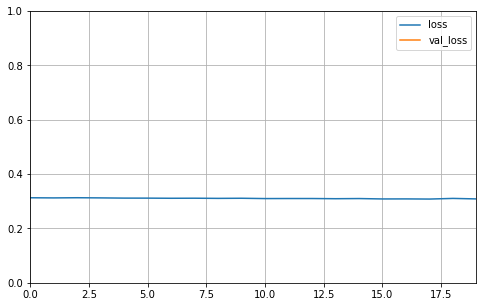

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [0]:
import os

log_dir = os.path.join(os.curdir, "Samplelogs")

def get_log_dir():
    import time
    times = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(log_dir, times)

In [0]:
event_dir = get_log_dir()
tb_callback = tf.keras.callbacks.TensorBoard(event_dir)

history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20, callbacks=[tb_callback])

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.3078 - val_loss: 24626.3002
Epoch 2/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.3072 - val_loss: 27169.2507
Epoch 3/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.3075 - val_loss: 24868.6192
Epoch 4/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.3069 - val_loss: 23068.6880
Epoch 5/20
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3067 - val_loss: 24830.5081
Epoch 6/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.3065 - val_loss: 25137.2094
Epoch 7/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.3061 - val_loss: 25897.8877
Epoch 8/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.3066 - val_loss: 24050.0588
Epoch 9/20
11610/11610 [==============================] - 1s 46

In [0]:
def tb(logdir=log_dir, port=6006, open_tab=True, sleep=3):
    import subprocess
    proc = subprocess.Popen(
        "tensorboard --logdir={0} --port={1}".format(logdir, port), shell=True)
    if open_tab:
        import time
        print("Waiting a few seconds for the TensorBoard Server to start...")
        time.sleep(sleep)
        import webbrowser
        webbrowser.open("http://127.0.0.1:{}/".format(port))
    return proc

In [0]:
help(tf.keras.callbacks.TensorBoard)

Help on class TensorBoard in module tensorflow.python.keras.callbacks:

class TensorBoard(Callback)
 |  Enable visualizations for TensorBoard.
 |  
 |  TensorBoard is a visualization tool provided with TensorFlow.
 |  
 |  This callback logs events for TensorBoard, including:
 |  * Metrics summary plots
 |  * Training graph visualization
 |  * Activation histograms
 |  * Sampled profiling
 |  
 |  If you have installed TensorFlow with pip, you should be able
 |  to launch TensorBoard from the command line:
 |  
 |  ```sh
 |  tensorboard --logdir=path_to_your_logs
 |  ```
 |  
 |  You can find more information about TensorBoard
 |  [here](https://www.tensorflow.org/get_started/summaries_and_tensorboard).
 |  
 |  Arguments:
 |      log_dir: the path of the directory where to save the log files to be
 |        parsed by TensorBoard.
 |      histogram_freq: frequency (in epochs) at which to compute activation and
 |        weight histograms for the layers of the model. If set to 0, histog

HyperParameter Tuning
- Hyperopt: a popular Python library for optimizing over all sorts of complex
search spaces (including real values such as the learning rate, or discrete values
such as the number of layers).
- Hyperas, kopt or Talos: optimizing hyperparameters for Keras model (the first
two are based on Hyperopt).
- Scikit-Optimize (skopt): a general-purpose optimization library. The Bayes
SearchCV class performs Bayesian optimization using an interface similar to Grid
SearchCV .
- Spearmint: a Bayesian optimization library.
- Sklearn-Deap: a hyperparameter optimization library based on evolutionary
algorithms, also with a GridSearchCV -like interface.

In [0]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = tf.keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(tf.keras.layers.Dense(1, **options))
    optimizer = tf.keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [0]:
keras_reg = tf.keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [0]:
keras_reg.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val))

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 51us/sample - loss: 1.1905 - val_loss: 22188.1083
Epoch 2/100
11610/11610 [==============================] - 1s 43us/sample - loss: 0.9192 - val_loss: 229160.0355
Epoch 3/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5423 - val_loss: 109126.5876
Epoch 4/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4955 - val_loss: 59602.6433
Epoch 5/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4771 - val_loss: 51414.3624
Epoch 6/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4602 - val_loss: 41412.2395
Epoch 7/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4508 - val_loss: 53116.3814
Epoch 8/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4444 - val_loss: 41733.9572
Epoch 9/100
11610/11610 [============================

In [0]:
from scipy.stats import reciprocal
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_srch = RandomizedSearchCV(keras_reg, param_distribs, cv=3, n_iter=10, verbose=2)
rnd_srch.fit(X_train, Y_train, validation_data=(X_val, Y_val))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.0004926210035629582, n_hidden=1, n_neurons=85 ...
Train on 7740 samples, validate on 3870 samples


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


3870/3870 [==============================] - 0s 22us/sample - loss: 1.9700
[CV]  learning_rate=0.0004926210035629582, n_hidden=1, n_neurons=85, total=   0.9s
[CV] learning_rate=0.0004926210035629582, n_hidden=1, n_neurons=85 ...
Train on 7740 samples, validate on 3870 samples


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


3870/3870 [==============================] - 0s 22us/sample - loss: 2.0009
[CV]  learning_rate=0.0004926210035629582, n_hidden=1, n_neurons=85, total=   1.0s
[CV] learning_rate=0.0004926210035629582, n_hidden=1, n_neurons=85 ...
Train on 7740 samples, validate on 3870 samples
3870/3870 [==============================] - 0s 23us/sample - loss: 2.1903
[CV]  learning_rate=0.0004926210035629582, n_hidden=1, n_neurons=85, total=   0.9s
[CV] learning_rate=0.005915232327224446, n_hidden=3, n_neurons=65 ....
Train on 7740 samples, validate on 3870 samples
3870/3870 [==============================] - 0s 22us/sample - loss: 0.5574
[CV]  learning_rate=0.005915232327224446, n_hidden=3, n_neurons=65, total=   1.0s
[CV] learning_rate=0.005915232327224446, n_hidden=3, n_neurons=65 ....
Train on 7740 samples, validate on 3870 samples
3870/3870 [==============================] - 0s 20us/sample - loss: 0.6924
[CV]  learning_rate=0.005915232327224446, n_hidden=3, n_neurons=65, total=   1.0s
[CV] learning

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   25.1s finished


11610/11610 [==============================] - 1s 45us/sample - loss: 0.6788 - val_loss: 114015.1099


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f67a3754128>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f67b3542518>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_trai

### Monte Carlo Dropout
- “Dropout as a Bayesian Approximation: Representing Model Uncertainty in Deep Learning,” Y. Gal and Z.
Ghahramani (2016).

In [0]:
with tf.keras.backend.learning_phase_scope(1):
    y_probas = np.stack([model.predict(X_test) for sample in range(100)])
y_proba = y_probas.mean(axis=0)